##Neural Networks

###1)What is deep learning, and how is it connected to artificial intelligence?

ANS:Deep learning is a subset of artificial intelligence (AI). It's a type of neural network that uses multiple layers of processing units to learn from data and make predictions or decisions. Essentially, deep learning provides a way for machines to learn complex patterns from large amounts of data, similar to how humans learn from experience.

###2) What is a neural network, and what are the different types of neural networks?

Ans:A neural network is a computational system inspired by the human brain that learns to perform tasks by analyzing examples. These networks are used in machine learning to identify patterns in data and make predictions or decisions. There are various types of neural networks, each with its own structure and application, including convolutional neural networks (CNNs), recurrent neural networks (RNNs), Feedforward neural networks(FNN) and Generative Adversarial Networks (GANs).

###3) What is the mathematical structure of a neural network?

Ans: z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
Where where z is the neuron's output, w's are weights, x's are inputs, and b is the bias.

###4) What is an activation function, and why is it essential in neural network?

ANS:An activation function is a mathematical function applied to the output of a neuron to determine its output signal. It's essential because it introduces non-linearity, allowing the network to learn complex relationships and patterns in the data, which would be impossible with only linear operations.


###5) Could you list some common activation functions used in neural networks?

ANS: Commonly used activation functions in neural networks include sigmoid(binary classification), tanh, ReLU, and Softmax(multi-class classification)

###6) What is a multilayer neural network?

Ans:A multilayer neural network is an artificial neural network with multiple layers of interconnected nodes (neurons). It consists of an input layer, one or more hidden layers, and an output layer. The hidden layers enable the network to learn complex, non-linear patterns and relationships in the Data.


###7) What is a loss function, and why is it crucial for neural network training?

ANS:A loss function in neural networks measures the discrepancy between a model's predictions and the actual values, quantifying the error. It's crucial for training because it guides the model's adjustment of parameters (weights) to minimize this error and improve predictive accuracy.

###8) What are some common types of loss functions?

ANS:Common types of loss functions include Mean Squared Error (MSE), Mean Absolute Error (MAE), Huber Loss, Cross-Entropy Loss, and Binary Cross-Entropy Loss.

###9) How does a neural network learn?

ANS:Neural networks learn through a process called training, where they adjust their internal weights and biases based on input data and feedback. This process involves feeding the network with data, comparing its predictions with actual values, and then refining the weights and biases to minimize the cost funtion. Algorithms like backpropagation are used to guide this refinement process.

###10) What is an optimizer in neural networks, and why is it necessary?

ANS:An optimizer in neural networks is a method used to update the network's weights and biases during training, guiding the model towards a solution that minimizes the loss function. It's crucial because it determines how and how quickly the model learns from the training data, ultimately affecting its accuracy and performance.


###11) Could you briefly describe some common optimizers?

ANS:Common optimizers include Gradient Descent, Stochastic Gradient Descent (SGD), mini batch gradient Descent, Momentum Optimizer, AdaGrad, Adam, and RMSprop,


###12) Can you explain forward and backward propagation in a neural network?

ANS: In neural networks, forward propagation involves feeding input data through the network to generate an output prediction, while backward propagation (or backpropagation) is the process of adjusting the network's parameters (weights and biases) based on the error between the prediction and the actual output. Forward propagation calculates the output, and backpropagation uses this output to learn and improve the network's accuracy.

###13) What is weight initialization, and how does it impact training?

ANS: Weight initialization refers to the process of assigning initial values to the weights and biases of a neural network before training begins. This process significantly impacts the training dynamics and the overall performance of the model and is proportional to cost function.

###14) What is the vanishing gradient problem in deep learning?
ANS:The vanishing gradient problem in deep learning occurs when gradients become extremely small/bigger as they are propagated backward through a deep neural network during training. This can hinder the ability of the network to effectively learn, particularly in lower layers, because the weight updates become negligible.


###15) What is the exploding gradient problem?

ANS:The exploding gradient problem is a challenge that can occur during the training of deep neural networks, where the gradients during backpropagation become excessively large. This leads to unstable training, large weight updates, and potentially diverging optimization, where the model's loss increases uncontrollably instead of decreasing.


##Practical


In [2]:
pip install tensorflow

###1) How do you create a simple perceptron for basic binary classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)  # For reproducibility
weights = np.random.rand(2)  # Two random weights
bias = np.random.rand(1)[0]  # Random bias
learning_rate = 0.1
epochs = 10
def step_function(x):
    return 1 if x >= 0 else 0

X = np.array([[2, 3], [1, 1], [2, 1], [3, 4], [4, 2], [1, 3]])
y = np.array([1, 0, 0, 1, 1, 0])  # Binary labels

for epoch in range(epochs):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias
        y_pred = step_function(linear_output)

        # Update weights and bias if prediction is incorrect
        update = learning_rate * (y[i] - y_pred)
        weights += update * X[i]
        bias += update

new_data = np.array([[3, 3], [2, 2]])
predictions = [step_function(np.dot(x, weights) + bias) for x in new_data]

print("Predictions:", predictions)


Predictions: [1, 0]


###2) How can you build a neural network with one hidden layer using Keras.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better optimization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(8, activation='relu', input_shape=(2,)),  # Hidden layer with 8 neurons
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron (Binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=4, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict on new data points
new_samples = np.array([[0.5, 0.5], [-1, 1]])
new_samples = scaler.transform(new_samples)
predictions = model.predict(new_samples)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to class labels
print("Predicted Classes:", predictions.flatten())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4250 - loss: 0.7067
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8327 - loss: 0.6113
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8596 - loss: 0.5401
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8506 - loss: 0.4687
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8848 - loss: 0.3985
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8780 - loss: 0.3848
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8940 - loss: 0.3306
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8488 - loss: 0.3388
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8688 - loss: 0.3248
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8387 - loss: 0.3525
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8612 - loss: 0.3063
Epoch 12/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

###3) How do you initialize weights using the Xavier (Glorot) initialization method in Keras.

In [5]:
from tensorflow.keras.initializers import GlorotUniform

layer = Dense(8, activation='relu', kernel_initializer=GlorotUniform())

# Define model with Xavier initialization
model = Sequential([
    Dense(8, activation='relu', kernel_initializer=GlorotUniform(), input_shape=(2,)),
    Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform())
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

###4) How can you apply different activation functions in a neural network in Keras.

In [6]:
from tensorflow.keras.layers import LeakyReLU

# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),   # Hidden layer with ReLU activation
    Dense(16, activation='tanh'),                      # Another hidden layer with Tanh
    Dense(8, activation=LeakyReLU(alpha=0.01)),        # Leaky ReLU with alpha parameter
    Dense(1, activation='sigmoid')                     # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

###5) How do you add dropout to a neural network model to prevent overfitting.

In [13]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),  # First hidden layer
    Dropout(0.3),  # Dropout layer (30% of neurons randomly deactivated)
    Dense(16, activation='relu'),  # Second hidden layer
    Dropout(0.3),  # Another Dropout layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=4, verbose=1)

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5863 - loss: 0.6514
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8392 - loss: 0.4738
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8417 - loss: 0.3601
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8803 - loss: 0.3102
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8654 - loss: 0.3042
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8652 - loss: 0.3057
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8268 - loss: 0.3389
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8801 - loss: 0.2866
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.2640
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8877 - loss: 0.2616
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8833 - loss: 0.2630
Epoch 12/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,925 (7.52 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,284 (5.02 KB)

###6) How do you manually implement forward propagation in a simple neural network.

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)


np.random.seed(42)  # Reproducibility

# Define weights (random initialization)
W1 = np.random.randn(3, 2)  # Hidden layer weights (3 neurons, 2 inputs)
b1 = np.random.randn(3, 1)  # Hidden layer biases

W2 = np.random.randn(1, 3)  # Output layer weights (1 neuron, 3 hidden units)
b2 = np.random.randn(1, 1)  # Output layer bias

def forward_propagation(X):
    # Hidden Layer
    Z1 = np.dot(W1, X) + b1  # Weighted sum
    A1 = relu(Z1)            # Apply ReLU activation

    # Output Layer
    Z2 = np.dot(W2, A1) + b2  # Weighted sum
    A2 = sigmoid(Z2)          # Apply Sigmoid activation

    return A2  # Final output (prediction)

X = np.array([[0.5], [1.5]])  # Input sample (2 features)
output = forward_propagation(X)
print("Final Prediction:", output)


Final Prediction: [[0.39092806]]


###7) How do you add batch normalization to a neural network model in Keras.

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from sklearn.datasets import make_classification


# Generate a synthetic dataset (binary classification)
X, y = make_classification(n_samples=500, n_features=5, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),  # First hidden layer
    BatchNormalization(),  # Apply Batch Normalization
    Dense(16, activation='relu'),  # Second hidden layer
    BatchNormalization(),  # Another Batch Normalization layer
    Dense(1, activation='sigmoid')  # Output layer (Binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

model.fit(X_train, y_train, epochs=30, batch_size=4, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 96 (384.00 B)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7165 - loss: 0.5835
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8278 - loss: 0.3831
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8343 - loss: 0.3636
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7955 - loss: 0.4595
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8322 - loss: 0.4033
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8514 - loss: 0.3793
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8498 - loss: 0.3681
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8065 - loss: 0.4358
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8398 - loss: 0.3928
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8264 - loss: 0.4044
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.3976
Epoch 12/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

###8) How can you visualize the training process with accuracy and loss curves.

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8364 - loss: 0.3416 - val_accuracy: 0.9400 - val_loss: 0.1837
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8395 - loss: 0.3607 - val_accuracy: 0.9400 - val_loss: 0.1669
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8495 - loss: 0.3451 - val_accuracy: 0.9300 - val_loss: 0.1757
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8391 - loss: 0.3677 - val_accuracy: 0.9400 - val_loss: 0.1793
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8442 - loss: 0.3634 - val_accuracy: 0.9500 - val_loss: 0.1838
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8465 - loss: 0.3688 - val_accuracy: 0.9300 - val_loss: 0.1727
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9056 - loss: 0.3172 - val_accuracy: 0.9300 - val_loss: 0.1784
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7955 - loss: 0.3772 - val_accuracy: 0.

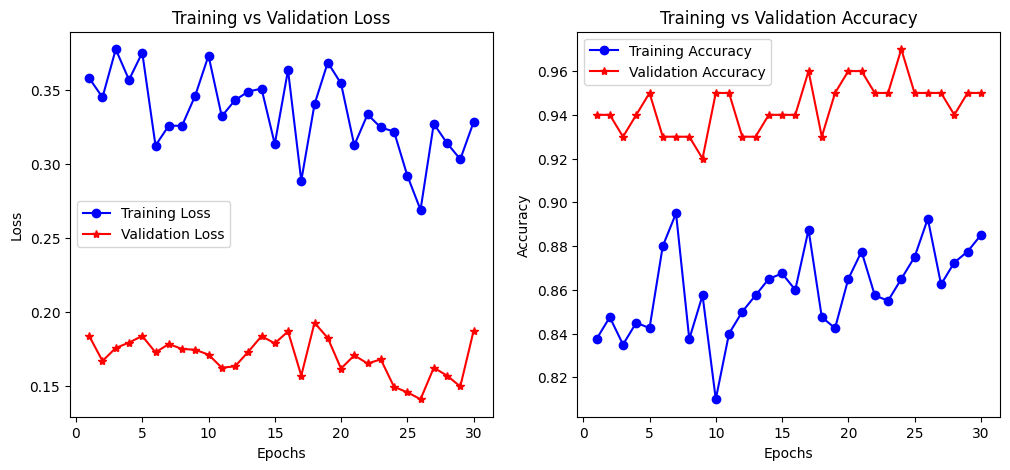

In [16]:
history = model.fit(X_train, y_train, epochs=30, batch_size=4, validation_data=(X_test, y_test), verbose=1)

import matplotlib.pyplot as plt

# Extract accuracy and loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.show()


###9) How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients.

In [17]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, clipnorm=1.0)  # Clips gradient norm to 1.0

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model with clipped gradients
model.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

###10)How can you create a custom loss function in Keras.

In [19]:
import tensorflow.keras.backend as K

def custom_loss(y_true, y_pred):
    """Example: Custom loss penalizing under-predictions more"""
    error = y_true - y_pred
    loss = K.mean(K.square(error)) + 0.5 * K.mean(K.maximum(-error, 0))
    return loss

# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(1, activation='sigmoid')
])

# Compile the model with custom loss
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=custom_loss,
              metrics=['accuracy'])

# Print model summary
model.summary()

def custom_mae_loss(y_true, y_pred):
    return K.mean(K.abs(y_true - y_pred))  # Equivalent to Mean Absolute Error (MAE)

model.compile(optimizer='adam', loss=custom_mae_loss, metrics=['mae'])


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

###11)How can you visualize the structure of a neural network model in Keras?

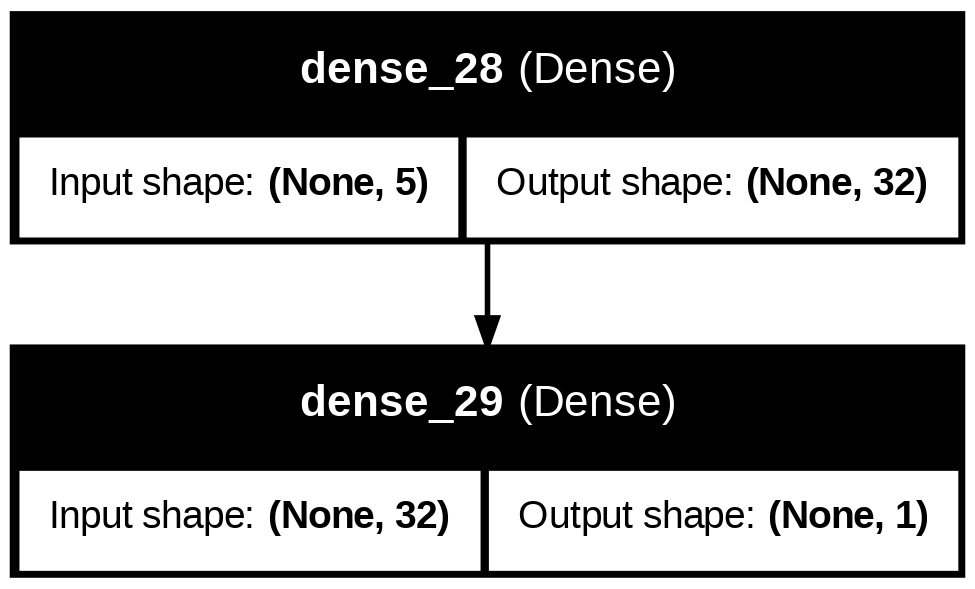

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)